# A Semi-automatic Classification of Normal Karyotypes based on Support Vector Machine Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

## Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals import joblib
from os import walk

import time

%matplotlib inline

## Samples
### File Import

In [2]:
pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\'
theWhole = {}

 
f = []
f_05 = []
mypath_05 = pathBase + 'chr_05'
for (dirpath, dirnames, filenames) in walk(mypath_05):
    f.extend(filenames)
for l in f:
    f_05.append(mypath_05 + '\\' + l)    
   
  
# ///////// Abnormal ones //////////////

f = []
f_5_p14_deletion = []
mypath_5_p14_deletion = pathBase + 'chr_5_p14_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_5_p14_deletion):
    f.extend(filenames)
for l in f:
    f_5_p14_deletion.append(mypath_5_p14_deletion + '\\' + l)  
    

theWhole['chr_05'] = f_05

theWhole['chr_5_p14_deletion'] = f_5_p14_deletion

In [3]:
theWhole['chr_5_p14_deletion']

['C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\chr_5_p14_deletion\\181558-10.jpg.5del.bmp',
 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\chr_5_p14_deletion\\181558-11.jpg.5del.bmp',
 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\chr_5_p14_deletion\\181558-14.jpg.5del.bmp',
 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\chr_5_p14_deletion\\181558-2.jpg.5del.bmp',
 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\chr_5_p14_deletion\\181558-4.jpg.5del.bmp',
 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\chr_5_p14_deletion\\181558-5.jpg.5del.bmp',
 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\chr_5_p14_deletion\\181558-6.jpg.5del.bmp',
 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\chr_5_p14_deletion\\181558-7.jpg.5del.bmp',
 'C:\\Users\\Chuan\\O

## Image Input

In [4]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

1.1133270263671875


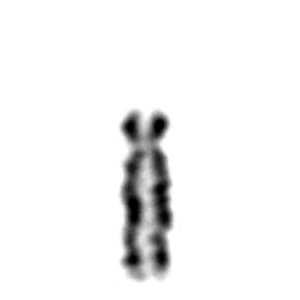

In [5]:
image['chr_5_p14_deletion'][1]

## Functions

In [6]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [7]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

## Data Extraction from Images

In [8]:
start = time.time()

data = {}
rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        rgb_data[chrNo].append(rgb)
        
end = time.time()
print(end - start)

14.718247652053833


In [9]:
imageMatrix = np.array(rgb_data['chr_5_p14_deletion'][1])

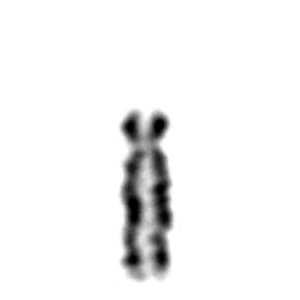

In [10]:
img = imageReconstruct(imageMatrix)
img

## Flat Transformation from 2D to 1D

In [11]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

## Support Vector Classification

In [12]:
x_train_list = []
y_train_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

### Training

In [13]:
start = time.time()

X_train = np.array(x_train_list)
y_train = np.array(y_train_list)

clf = svm.SVC(kernel='linear', decision_function_shape='ovo')
clf.fit(X_train, y_train)

end = time.time()

In [14]:
print(end - start)

0.9450347423553467


### Prediction

In [15]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.37169225e-20 2.37169225e-20]]
b =  [-2.6265681]
Indices of support vectors =  [ 0  2  6  7  8 12 13 14 16 17 18 26 28 35 36 41 44 47 50 52 63 67 70 73
 79 80 81 82 83 84 85 86 87 88]
Support vectors =  [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
Number of support vectors for each class =  [24 10]
Coefficients of the support vector in the decision function =  [[1.52403125e-08 1.49014963e-08 4.67830972e-08 2.31092994e-08
  3.44578896e-08 2.90692919e-08 5.55678696e-08 9.60241616e-09
  3.46587395e-08 3.12040517e-08 1.56850204e-08 3.83823777e-08
  4.65741534e-09 1.88608805e-08 2.53259558e-08 1.89748678e-09
  1.17225502e-08 1.86904608e-09 7.35236288e-09 3.50586951e-08
  2.12748002e-08 1.97474170e-08 4.57074217e-10 2.97854621e-08
  5.6881

In [16]:
pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\test\\'
theWhole = {}

f = []
f_05 = []
mypath_05 = pathBase + 'chr_05'
for (dirpath, dirnames, filenames) in walk(mypath_05):
    f.extend(filenames)
for l in f:
    f_05.append(mypath_05 + '\\' + l)    
   
  
# ///////// Abnormal ones //////////////

f = []
f_5_p14_deletion = []
mypath_5_p14_deletion = pathBase + 'chr_5_p14_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_5_p14_deletion):
    f.extend(filenames)
for l in f:
    f_5_p14_deletion.append(mypath_5_p14_deletion + '\\' + l)  
    

theWhole['chr_05'] = f_05

theWhole['chr_5_p14_deletion'] = f_5_p14_deletion

In [17]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

0.019922733306884766


### Data Extraction

In [18]:
start = time.time()

data = {}
rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        rgb_data[chrNo].append(rgb)
        
end = time.time()
print(end - start)

3.32417893409729


### 2D to 1D

In [19]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [20]:
x_test_list = []
y_test_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_list)

## Performance Measures

In [22]:
y_predict = clf.predict(X_test)
y_test = y_test

In [23]:
y_predict

array(['chr_05', 'chr_05', 'chr_05', 'chr_05', 'chr_05', 'chr_05',
       'chr_05', 'chr_05', 'chr_05', 'chr_05', 'chr_5_p14_deletion',
       'chr_5_p14_deletion', 'chr_5_p14_deletion', 'chr_5_p14_deletion',
       'chr_05', 'chr_5_p14_deletion', 'chr_5_p14_deletion',
       'chr_5_p14_deletion', 'chr_05'], dtype='<U18')

In [24]:
y_test

array(['chr_05', 'chr_05', 'chr_05', 'chr_05', 'chr_05', 'chr_05',
       'chr_05', 'chr_05', 'chr_05', 'chr_05', 'chr_5_p14_deletion',
       'chr_5_p14_deletion', 'chr_5_p14_deletion', 'chr_5_p14_deletion',
       'chr_5_p14_deletion', 'chr_5_p14_deletion', 'chr_5_p14_deletion',
       'chr_5_p14_deletion', 'chr_5_p14_deletion'], dtype='<U18')

### Confusion Matrix (混淆矩阵)

In [25]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=['chr_05', 'chr_5_p14_deletion']))
confusion = pd.DataFrame(cm, index=['chr_05', 'chr_5_p14_deletion'],
                        columns=['Predictive chr_05', 
                                'Predictive chr_5_p14_deletion'],)
confusion.to_csv('ConfusionMatrix_5.csv')
confusion

,Predictive chr_05,Predictive chr_5_p14_deletion
chr_05,10,0
chr_5_p14_deletion,2,7


In [26]:
print(classification_report(y_test, y_predict))

                    precision    recall  f1-score   support

            chr_05       0.83      1.00      0.91        10
chr_5_p14_deletion       1.00      0.78      0.88         9

         micro avg       0.89      0.89      0.89        19
         macro avg       0.92      0.89      0.89        19
      weighted avg       0.91      0.89      0.89        19



## Save the Model

In [27]:
c = joblib.dump(clf, 'trained_model_5.m')
print(c)

['trained_model_5.m']


## Load the Model

In [28]:
d = joblib.load('trained_model_5.m')
print(d)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
